### Import Programs

In [53]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import datetime as dt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas.core import datetools

from sklearn.preprocessing import LabelEncoder

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, average_precision_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Import Dataset from Excel file

These are the files produced in the previous Python notebook that performed cleansing and initial feature reduction.

In [55]:
X = pd.read_csv('data/HID_features.csv', index_col=0)
df_clean = pd.read_csv('data/df_clean.csv', index_col=0)

### Make more balanced datasets for the label ('IS_HID') - NO LONGER NEEDED!!

This dataset has a very big imbalanced class problem for the label attribute ('IS_HID' = a flag for whether the pharmacy is a current contract pharmacy of Macro Helix).   

        Positive labeled observations     177    xxxxx     now  841 (340B_Active)
        Negative labeled observations   4,669    xxxxx     now 4005

To address this, we undersampled the Negative class (picked a random 1,000 observations out of the 4,669 Negative observations) to make the training set more balanced.

In [56]:
X.columns

Index(['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',
       'LMS_Enrolled', 'LMS_Available_Matching_Funds',
       'LMS_Used_Funds_Most_Recent_3_Months',
       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',
       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',
       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',
       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',
       'DLC_Program_encoded', 'FEM_Program_encoded',
       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',
       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',
       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',
       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',
       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',
       'Msa_Dma_encoded', 'Signage_Program_encoded'],
      dtype='object')

In [57]:
# MH = df_clean.loc[df_clean['IS_HID'] == 1]          - no longer need undersampling

In [58]:
# MH.head()       - no longer need undersampling

In [59]:
# NonMH = df_clean.loc[df_clean['IS_HID'] == 0]              - no longer need undersampling

In [60]:
# NonMH.head()      - no longer need undersampling

In [61]:
# Get a samller, random sample of Negative observations and add to Positive observations - to balance the classes

#NonMHsample1 = NonMH.sample(n=1000)
#dfsample1 = MH.append(NonMHsample1)

In [62]:
#dfsample1.head()

In [63]:
"""   ## - no longer need undersampling
X1 = dfsample1[['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',
       'LMS_Enrolled', 'LMS_Available_Matching_Funds',
       'LMS_Used_Funds_Most_Recent_3_Months',
       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',
       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',
       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',
       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',
       'DLC_Program_encoded', 'FEM_Program_encoded',
       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',
       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',
       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',
       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',
       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',
       'Msa_Dma_encoded', 'Signage_Program_encoded',
       'Hospital_Associated_encoded']]
     
"""

"   ## - no longer need undersampling\nX1 = dfsample1[['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',\n       'LMS_Enrolled', 'LMS_Available_Matching_Funds',\n       'LMS_Used_Funds_Most_Recent_3_Months',\n       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',\n       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',\n       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',\n       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',\n       'DLC_Program_encoded', 'FEM_Program_encoded',\n       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',\n       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',\n       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',\n       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',\n       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',\n       'Msa_Dma_encoded', 'Signage_Program_encoded',\n       'Hospital_Asso

In [64]:
X.head()

,Auto_Ship_Ind,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,Open_Smart,PIP_Program,PQS_Program,SCS_Program,...,Bus_Type_Desc_encoded,Region_encoded,PSAO_Expanded_encoded,Chain_Name_encoded,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded
Account,,,,,,,,,,,,,,,,,,,,,
10491,1,1724.0,1,822.0,1,1,0,1,1,1,...,0,3,16,39,1,4,1,7,183,0
17475,1,0.0,1,0.0,1,1,0,0,1,1,...,0,3,0,39,1,0,3,3,190,0
19901,0,0.0,1,0.0,1,1,0,1,1,1,...,0,3,0,39,1,0,4,2,183,0
309745,0,2500.0,1,0.0,0,0,0,0,0,0,...,0,3,0,39,1,0,1,8,183,3
652229,0,0.0,1,340.0,1,0,0,0,1,0,...,0,3,0,38,1,0,0,8,183,0


In [65]:
y = df_clean['340B_Active']

In [66]:
# y_small = dfsample1['IS_HID']      - no longer need undersampling

### Try some models and look at performance metrics and important features

In [67]:
# Split the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_
pred_rf = rf.predict(X_test) 
rf_score_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
rf_score_recall = recall_score(y_test, pred_rf, average='weighted')
rf_score_avgprecision = average_precision_score(y_test, pred_rf)

print("Accuracy Score cross-validated: ", rf_score_acc)
print("Recall Score: ", rf_score_recall)
print("Precision Score average:  ", rf_score_avgprecision)

R2 Score cross-validated:  -0.142710061783
Recall Score:  0.8275
Precision Score average:   0.233171392647


The most important measure for this business problem is Recall.  This is because Recall captures how many actual Positives the model finds.  In other words, does the model correctly predict current contract pharmacies of Macro Helix?   We want a model that can recognize an actual contract pharmacy.  Precision is not as important, as this captures how many the model labels as positive, compared to how many of those actually are positive; since we know that most of the pharmacies are not currently contract pharmacies, this measure is not very useful to the problem.  Similarly, Accuracy/R2 is not as important because since most in the dataset are negative, the model could merely predict all are negative and have a great Accuracy/R2 score -- not very meaningful.

In [69]:
feature_imp_rf = pd.DataFrame({'Feature Importance' : rf.feature_importances_}, index=X.columns)
print(feature_imp_rf)

                                        Feature Importance
Auto_Ship_Ind                                     0.017001
Interior_Decor_Signage_Available_Funds            0.043027
LMS_Enrolled                                      0.008023
LMS_Available_Matching_Funds                      0.066025
LMS_Used_Funds_Most_Recent_3_Months               0.012708
LMS_Used_Funds_Previous_3_Months                  0.012963
Open_Smart                                        0.005560
PIP_Program                                       0.012806
PQS_Program                                       0.012982
SCS_Program                                       0.015866
Spar_Coverage_Ind                                 0.009563
Specialty_Solutions                               0.001633
Vaccine_Items                                     0.010757
Vaccine_Starter                                   0.012423
Vaccine_Items_Count                               0.021860
Vaccine_Items_Sls_Amt                             0.0368

In [70]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.feature_importances_
pred_dt = dt.predict(X_test) 
dt_score_acc = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
dt_score_recall = recall_score(y_test, pred_dt, average='weighted')
dt_score_avgprecision = average_precision_score(y_test, pred_dt)

print("Accuracy Score cross-validated: ", dt_score_acc)
print("Recall Score: ", dt_score_recall)
print("Precision Score average:  ", dt_score_avgprecision)

R2 Score cross-validated:  -0.622500017042
Recall Score:  0.759375
Precision Score average:   0.239638080252


In [71]:
feature_imp_dt = pd.DataFrame({'Feature Importance' : dt.feature_importances_}, index=X.columns)
print(feature_imp_dt)

                                        Feature Importance
Auto_Ship_Ind                                     0.016890
Interior_Decor_Signage_Available_Funds            0.055835
LMS_Enrolled                                      0.004752
LMS_Available_Matching_Funds                      0.070327
LMS_Used_Funds_Most_Recent_3_Months               0.008734
LMS_Used_Funds_Previous_3_Months                  0.012627
Open_Smart                                        0.005068
PIP_Program                                       0.002675
PQS_Program                                       0.004087
SCS_Program                                       0.014668
Spar_Coverage_Ind                                 0.004914
Specialty_Solutions                               0.002533
Vaccine_Items                                     0.009755
Vaccine_Starter                                   0.014806
Vaccine_Items_Count                               0.013532
Vaccine_Items_Sls_Amt                             0.0488

In [72]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.feature_importances_
pred_gb = gb.predict(X_test) 
gb_score_acc = np.mean(cross_val_score(gb, X_train, y_train, cv=5))
gb_score_recall = recall_score(y_test, pred_gb, average='weighted')
gb_score_avgprecision = average_precision_score(y_test, pred_gb)

print("Accuracy Score cross-validated: ", gb_score_acc)
print("Recall Score: ", gb_score_recall)
print("Precision Score average:  ", gb_score_avgprecision)

R2 Score cross-validated:  -0.172701585846
Recall Score:  0.831875
Precision Score average:   0.234700528202


In [73]:
feature_imp_gb = pd.DataFrame({'Feature Importance' : gb.feature_importances_}, index=X.columns)
print(feature_imp_gb)

                                        Feature Importance
Auto_Ship_Ind                                     0.002032
Interior_Decor_Signage_Available_Funds            0.011721
LMS_Enrolled                                      0.002493
LMS_Available_Matching_Funds                      0.114019
LMS_Used_Funds_Most_Recent_3_Months               0.000000
LMS_Used_Funds_Previous_3_Months                  0.003831
Open_Smart                                        0.000223
PIP_Program                                       0.014256
PQS_Program                                       0.003012
SCS_Program                                       0.008242
Spar_Coverage_Ind                                 0.001737
Specialty_Solutions                               0.010256
Vaccine_Items                                     0.001058
Vaccine_Starter                                   0.004761
Vaccine_Items_Count                               0.009511
Vaccine_Items_Sls_Amt                             0.0389

In [74]:
# show which features are most important

def plot_feature_importance(model, df):
    cols = []
    for col in df.columns:
        cols.append(col)

    feature_importances = pd.DataFrame({'Feature Importance' : model.feature_importances_}, index=cols)
    feature_importances = feature_importances.sort_values(by='Feature Importance')
    feature_importances.plot(kind='barh', color='r', figsize=(6,6))
    plt.title('Feature Importance', fontsize=18)
    plt.tight_layout()
    plt.savefig('figures/feat_import.png', dpi=300)

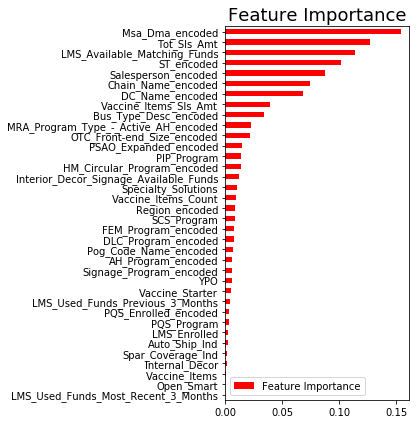

In [75]:
plot_feature_importance(gb, X_test)

### Reduce the dimensions even further, based on Feature Importance

Pick the top features to model, making the model simpler but still performing as well.

In [110]:
XR = X[['DC_Name_encoded','Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [111]:
XR_train = X_train[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

XR_test = X_test[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [82]:
# Gradient Boosting with reduced features

gbr = GradientBoostingClassifier()
gbr.fit(XR_train, y_train)
gbr.feature_importances_
pred_gbr = gbr.predict(XR_test) 
gbr_score_acc = np.mean(cross_val_score(gbr, XR_train, y_train, cv=5))
gbr_score_recall = recall_score(y_test, pred_gbr, average='weighted')
gbr_score_avgprecision = average_precision_score(y_test, pred_gbr)

print("Accuracy Score cross-validated: ", gbr_score_acc)
print("Recall Score: ", gbr_score_recall)
print("Precision Score average:  ", gbr_score_avgprecision)

Accuracy Score cross-validated:  0.834566151154
Recall Score:  0.83625
Precision Score average:   0.242491875301


In [84]:
feature_imp_gbr = pd.DataFrame({'Feature Importance' : gbr.feature_importances_}, index=XR.columns)
print(feature_imp_gbr)

                              Feature Importance
DC_Name_encoded                         0.079873
Tot_Sls_Amt                             0.224008
Msa_Dma_encoded                         0.210479
Salesperson_encoded                     0.139218
ST_encoded                              0.111483
Chain_Name_encoded                      0.081984
LMS_Available_Matching_Funds            0.152955


Save processed data to files for review

In [85]:
X.to_csv('data/HID_all_obs.csv')
#X1.to_csv('data/HID_undersampled_obs.csv')  - no longer need undersampling
XR.to_csv('data/HID_reduced_features.csv')
#dfsample1.to_csv('data/HID_undersampled_w_label.csv') - no longer need undersampling

### GridSearch to optimize the model, using the reduced feature set

How can we optimized the model that seems to perform the best?   We try many parameters via GridSearch.

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
gbr_params = dict(learning_rate=np.arange(0.1, 0.5, 0.1),
                        min_samples_split=np.arange(2,5,1),
                        max_depth=np.arange(1, 7, 1),
                        max_features=np.array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2']),
                        n_estimators=np.arange(60, 140, 10))

In [88]:
gs_gbr = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbr_params)

In [89]:
gs_gbr.fit(XR_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.1,  0.2,  0.3,  0.4]), 'min_samples_split': array([2, 3, 4]), 'max_depth': array([1, 2, 3, 4, 5, 6]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2'], dtype=object), 'n_estimators': array([ 60,  70,  80,  90, 100, 110, 120, 130])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
gs_gbr.best_params_

{'learning_rate': 0.10000000000000001,
 'max_depth': 6,
 'max_features': 1,
 'min_samples_split': 4,
 'n_estimators': 110}

In [91]:
gs_gbr.best_score_

0.84195933456561922

In [92]:
gs_gbr.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.10000000000000001, loss='deviance',
              max_depth=6, max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=110,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [93]:
best_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40000000000000002, loss='deviance',
              max_depth=3, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
best_model.fit(XR_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [102]:
best_model.feature_importances_
pred_best_model = best_model.predict(XR_test) 
best_model_score_acc = np.mean(cross_val_score(best_model, XR_train, y_train, cv=5))
best_model_score_recall = recall_score(y_test, pred_best_model, average='weighted')
best_model_score_avgprecision = average_precision_score(y_test, pred_best_model)

print("Accuracy Score cross-validated: ", best_model_score_acc)
print("Recall Score: ", best_model_score_recall)
print("Precision Score average:  ", best_model_score_avgprecision)

Accuracy Score cross-validated:  0.833324465867
Recall Score:  0.83375
Precision Score average:   0.267766129032


### Run the model (reduced feature set) on ALL observations

We trained and fitted the model with a reduced set of observations (to address the class imbalance for the label), so now we want to try the model on all observations, to learn which pharmacies it predicts as contract pharmacies for Macro Helix.

In [117]:
XR_all_obs = X[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']] 

In [118]:
pred_best_model_all_obs = best_model.predict(XR_all_obs)

In [119]:
best_model_all_obs_score_acc = np.mean(cross_val_score(best_model, XR, y, cv=5))
best_model_all_obs_score_recall = recall_score(y, pred_best_model_all_obs, average='weighted') 
best_model_all_obs_score_avgprecision = average_precision_score(y, pred_best_model_all_obs)

print("Accuracy Score cross-validated: ", best_model_all_obs_score_acc)
print("Recall Score: ", best_model_all_obs_score_recall)
print("Precision Score average:  ", best_model_all_obs_score_avgprecision)

Accuracy Score cross-validated:  0.172326875406
Recall Score:  0.869376805613
Precision Score average:   0.388371771362


Recall score is improved and is AWESOME!

### Put Actual 340B and Predicted 340B into final dataset

In [120]:
df_clean['Actual_340B'] = df_clean['340B_Active'] 

In [121]:
df_clean['Predicted_340B'] = pred_best_model_all_obs           

In [122]:
df_clean.head()

,Zip,Hm_Start_Dt,Channel_Type_Cd,Auto_Ship_Ind,Internal_Decor,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,...,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded,3rd_Party_Vendor_encoded,Hospital_Associated_encoded,Actual_340B,Predicted_340B
Account,,,,,,,,,,,,,,,,,,,,,
10491,97463,732524,30,1,1,1724.0,1,822.0,1,1,...,1,4,1,7,183,0,18,15,0,0
17475,97630,732687,30,1,1,0.0,1,0.0,1,1,...,1,0,3,3,190,0,18,15,0,0
19901,97471,732616,30,0,1,0.0,1,0.0,1,1,...,1,0,4,2,183,0,18,15,0,0
309745,97467,735998,30,0,0,2500.0,1,0.0,0,0,...,1,0,1,8,183,3,18,15,0,0
652229,97370,734702,30,0,1,0.0,1,340.0,1,0,...,1,0,0,8,183,0,18,15,0,0


Save to file for the business to review predicted contract pharmacies.

In [123]:
df_clean.to_csv('data/HID_predictions.csv')

In [127]:
len(df_clean[df_clean['Predicted_340B']==1])

424